In [11]:
import os
import sys
sys.path.insert(0,'..')
import numpy as np
from analysis.tf_utils import *
from analysis.analysis_utils import *
import matplotlib.pyplot as plt
from analysis.summary import run_summary
from analysis.summary_parallel import Summary

%matplotlib inline

# Experiment settings

In [12]:
base_dir = ""
task_dir_nr = "datasweep_suppb.pkl"
task_dir_r = "datasweep_main_long_lfp.pkl"
task_dir_nr_rd = "datasweep_suppb_r2.pkl"

summary_settings = {
    "upsample" : 1, # Increase temporal resolution
    "ref_phase" : "sine", # Reference phase for 'spike-phase' histogram, either sine or LFP
    "onlyGaba" : False,  # Only use inhibitory neurons for calculating LFP
    "cutoff_p": 10e-3, # For Wilc p test
    "normalize_fr_extract":  True,  # Normalize extracted firing rates
    "n_trials": 224,  # Number trials used in analysis
    "randomize_onset": False, # Randomise stimulus onset
    "delay_ms": 10000, # Delay time in ms
    "disable_noise": False, # With or without noise
    "freqs_l": np.logspace(*np.log10([0.33, 5]), num=60), # Frequencies for spectrograms
    "balance_trials": True, # Draw trials with balanced proportion of each stimuli
    "substr_mean_LFP": False, # Substract mean LFP
    "delay_buffer1": 25, # Disregard short period after stimulus offset
    "delay_buffer2": 25, # Disregard short period before probe onset
    "nbins": 1, # Number of bins for 'spike' phase histograms
    "common_baseline" : True, # Common baseline
    "freqs": [] # Frequencies for vex plots
}
pltcolors, pltcolors_alt = steffiscolours()


# Run or load summary over many models

In [13]:
#note that the accuracy here is bad, because of the long delay 
#period used for accurate power calculation


model_dir = os.path.join(base_dir, "..", "models/sweep_suppb")
data_dir = "../data/"+str(task_dir_nr)
data_list_nr, summary_settings_nr = run_summary(summary_settings, model_dir, data_dir)
print(len(summary_settings_nr['freqs_l']),summary_settings_nr['freqs_l'][0],summary_settings_nr['freqs_l'][-1])

model_dir = os.path.join(base_dir, "..", "models/sweep_delay_random")
data_dir = "../data/"+str(task_dir_nr_rd)
ress,_ = run_summary(summary_settings, model_dir, data_dir)
data_list_nr_rd=ress['results']
summary_settings_nr_rd=ress['summary_settings']
print(len(summary_settings_nr_rd['freqs_l']),summary_settings_nr_rd['freqs_l'][0],summary_settings_nr_rd['freqs_l'][-1])

model_dir = os.path.join(base_dir, "..", "models/sweep_main")
data_dir = "../data/"+str(task_dir_r)
ress,_ = run_summary(summary_settings, model_dir, data_dir)
data_list_r=ress['results']
summary_settings_r=ress['summary_settings']

print(len(summary_settings_r['freqs_l']),summary_settings_r['freqs_l'][0],summary_settings_r['freqs_l'][-1])



60 0.33 5.000000000000001
50 0.33 5.000000000000001
60 0.33 5.000000000000001


In [14]:
t1_b = 300
t2_b = 900
t1_d = 1340
t2_d = 1940

([<matplotlib.axis.YTick at 0x2864ccee0>,
 [Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2'), Text(0, 0.4, '0.4')])

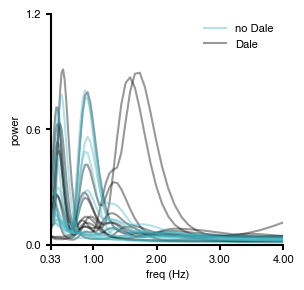

In [15]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))


for i in range(24):
    if np.sum(data_list_nr['w_rec'][i][1]) <150:
        plt.plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_b:t2_b],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_b:t2_b],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.legend()
plt.ylim(0,1.2)
plt.xticks([0.33,2,1,3,4])
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b1", facecolor="white", transparent=False)
plt.yticks([0,0.6,1.2])



([<matplotlib.axis.YTick at 0x28668cfa0>,
 [Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2'), Text(0, 0.4, '0.4')])

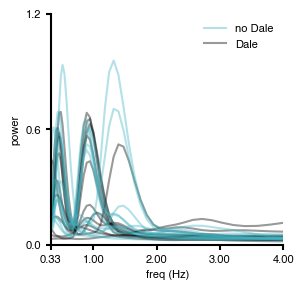

In [16]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))


for i in range(24):
    if np.sum(data_list_nr['w_rec'][i][1]) <150:
        plt.plot(summary_settings_nr_rd['freqs_l'],np.mean(data_list_nr_rd[i]['post_spectrum'][:,t1_b:t2_b],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings_nr_rd['freqs_l'],np.mean(data_list_nr_rd[i]['post_spectrum'][:,t1_b:t2_b],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.legend()
plt.ylim(0,1.2)
plt.xticks([0.33,2,1,3,4])
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b1", facecolor="white", transparent=False)
plt.yticks([0,0.6,1.2])



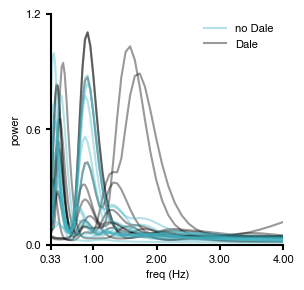

In [17]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))

for i in range(24):
    if np.sum(data_list_nr['w_rec'][i][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_d:t2_d],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_d:t2_d],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.xticks([0.33,2,1,3,4])
plt.yticks([0,0.6,1.2])


plt.legend()
plt.ylim(0,1.2)
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b2", facecolor="white", transparent=False)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


26


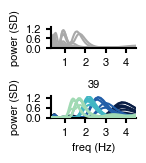

In [31]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 1
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
fig,axs = plt.subplots(2,figsize = (1.5,1.5))

color1 = 'darkgrey'
ls1='-'
alpha = 1#.5

for i in range(24):
    if np.sum(data_list_nr['w_rec'][i][1]) <150:
        axs[0].plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_d:t2_d],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)

            
axs[0].set_xlim(.3,4.5)
axs[0].set_xticks([1,2,3,4])
axs[0].set_yticks([0,0.6,1.2])


axs[0].set_ylim(0,1.3)
#plt.xlabel("freq (Hz)")
axs[0].set_ylabel("power (SD)")


#freqs_l = np.logspace(*np.log10([1, 20]), num=50)
mod_frs = [data_list_r[i]['loss_f'] for i in range(len(data_list_r))]

color_inds =3-np.argsort(mod_frs)[::-1].argsort()//10
num_s =0

counts={3.73:0,
        2.75:0,
        2.04:0,
        1.5:0}

passed_list = []
for i in range(40):
    freq = summary_settings_r['freqs_l'][np.argmax(np.mean(data_list_r[i]['post_spectrum'][:,t1_d:t2_d],axis=1))]
    if np.isclose(data_list_r[i]['loss_f'],freq,atol=.5):
        counts[data_list_r[i]['loss_f']]=counts[data_list_r[i]['loss_f']]+1
        color=pltcolors_alt[color_inds[i]]
        #fig,axs = plt.subplots(2,figsize = (1.5,1.5))
        axs[1].plot(summary_settings_r['freqs_l'],np.mean(data_list_r[i]['post_spectrum'][:,t1_d:t2_d],axis=1), 
                    color = color,alpha=alpha, ls = ls2,zorder =3-color_inds[i])

        num_s+=1
        #print(i, data_list_r[i]['model_names'])
        #axs[1].axvline(data_list_r[i]['loss_f'],color='k',ls='--')
        passed_list.append(data_list_r[i]['model_names']) 
    else:
        color=pltcolors_alt[color_inds[i]]

        #fig,axs = plt.subplots(2,figsize = (1.5,1.5))
        #axs[1].plot(summary_settings_r['freqs_l'],np.mean(data_list_r[i]['post_spectrum'][:,t1_d:t2_d],axis=1), 
        #            color = color,alpha=alpha, ls = '--',zorder =3-color_inds[i])
        #axs[1].axvline(data_list_r[i]['loss_f'],color='k',ls='--')
        #print(i, data_list_r[i]['model_names'])
        #axs[1].set_title(i)

axs[1].set_xlim(.3,4.5)
axs[1].set_xticks([1,2,3,4])
axs[1].set_yticks([0,0.6,1.2])

print(num_s)

axs[1].set_ylim(0,1.3)

axs[1].set_xlabel("freq (Hz)")
axs[1].set_ylabel("power (SD)")
plt.tight_layout()
plt.savefig("../figures/Supp_b2.pdf", facecolor="white", transparent=False)


In [32]:
counts

{3.73: 8, 2.75: 5, 2.04: 7, 1.5: 6}

In [33]:
passed_list

['a2r9nqtkSpecRad1.5DaleTrueTC20_100rand0sparse1osc3.73cost0.1',
 'd9weac1lSpecRad1.5DaleTrueTC20_100rand0sparse1osc2.04cost0.1',
 'd9weac1lSpecRad1.5DaleTrueTC20_100rand0sparse1osc2.75cost0.1',
 'd9weac1lSpecRad1.5DaleTrueTC20_100rand0sparse1osc3.73cost0.1',
 'k56ppwz0SpecRad1.5DaleTrueTC20_100rand0sparse1osc1.5cost0.1',
 'k56ppwz0SpecRad1.5DaleTrueTC20_100rand0sparse1osc2.04cost0.1',
 'k56ppwz0SpecRad1.5DaleTrueTC20_100rand0sparse1osc3.73cost0.1',
 'nwi3j7o8SpecRad1.5DaleTrueTC20_100rand0sparse1osc1.5cost0.1',
 'nwi3j7o8SpecRad1.5DaleTrueTC20_100rand0sparse1osc2.04cost0.1',
 'nwi3j7o8SpecRad1.5DaleTrueTC20_100rand0sparse1osc3.73cost0.1',
 'ov6lf3z8SpecRad1.5DaleTrueTC20_100rand0sparse1osc1.5cost0.1',
 'ov6lf3z8SpecRad1.5DaleTrueTC20_100rand0sparse1osc2.04cost0.1',
 'ov6lf3z8SpecRad1.5DaleTrueTC20_100rand0sparse1osc2.75cost0.1',
 'ov6lf3z8SpecRad1.5DaleTrueTC20_100rand0sparse1osc3.73cost0.1',
 'qejiyxenSpecRad1.5DaleTrueTC20_100rand0sparse1osc1.5cost0.1',
 'qejiyxenSpecRad1.5DaleTrueT

0.9025653325237755


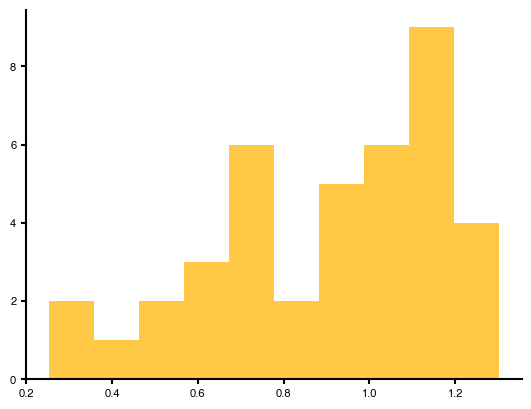

In [ ]:
powers_d = []
for i in range(40):
    powers_d.append(np.max(np.mean(data_list_r[i]['post_spectrum'][:,t1_d:t2_d],axis=1)))
print(np.mean(powers_d))
plt.hist(powers_d);

0.6937375900216131


(array([7., 4., 3., 3., 9., 8., 2., 4.]),
 array([0.05274234, 0.22054043, 0.38833852, 0.55613661, 0.7239347 ,
        0.89173278, 1.05953087, 1.22732896, 1.39512705]),
 <BarContainer object of 8 artists>)

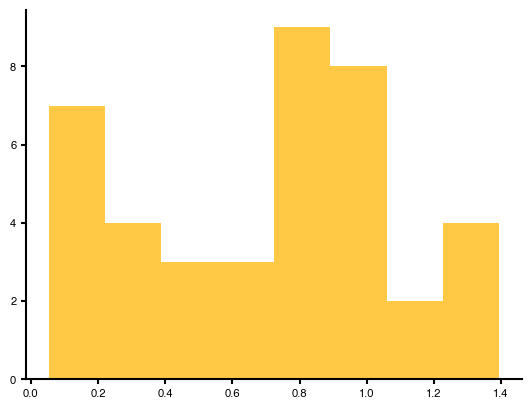

In [10]:
powers_b = []
for i in range(40):
    powers_b.append(np.max(np.mean(data_list_r[i]['post_spectrum'][:,t1_b:t2_b],axis=1)))
print(np.mean(powers_b))
plt.hist(powers_b,bins=8)

In [14]:
from scipy.stats import ranksums
ranksums(powers_b,powers_d,alternative='less')

RanksumsResult(statistic=-2.5403411844343533, pvalue=0.005537218838078303)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


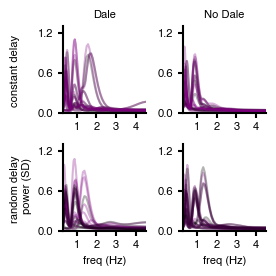

In [56]:
freqs_l=summary_settings['freqs_l']
color1 = 'black'
color2 = pltcolors_alt[0]
color2='black'
ls1='-'
ls2='-'
alpha = 1
zorder1 = 1
zorder2 = .5
legend1 = True
legend2 = True
fig,axs = plt.subplots(2,2, figsize = (2.8,2.8))

color1 = 'purple'
ls1='-'
alpha =.3
for i in range(24):
    #TOP ROW
    if np.sum(data_list_nr['w_rec'][i][1]) <150:
        #Dale
        axs[0,0].plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_d:t2_d],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,zorder =zorder1)
        #axs[0,0].plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_b:t2_b],axis=1), 
        #         color = color2,alpha=alpha, ls = ls1,zorder =zorder2)


    else:
        #No Dale
        axs[0,1].plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_d:t2_d],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,zorder =zorder1)

        #axs[0,1].plot(summary_settings_nr['freqs_l'],np.mean(data_list_nr['post_spectrum'][i][:,t1_b:t2_b],axis=1), 
        #         color = color2,alpha=alpha, ls = ls1,zorder =zorder2)

    #BOTTOM ROW
    if np.sum(data_list_nr['w_rec'][i][1]) <150:
        axs[1,0].plot(summary_settings_nr_rd['freqs_l'],np.mean(data_list_nr_rd[i]['post_spectrum'][:,t1_d:t2_d],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        #axs[1,0].plot(summary_settings_nr_rd['freqs_l'],np.mean(data_list_nr_rd[i]['post_spectrum'][:,t1_b:t2_b],axis=1), 
        #        color = color2,alpha=alpha, ls = ls1,label='Dale' if legend2 else '',zorder =zorder1)

    else:
        axs[1,1].plot(summary_settings_nr_rd['freqs_l'],np.mean(data_list_nr_rd[i]['post_spectrum'][:,t1_d:t2_d],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        #axs[1,1].plot(summary_settings_nr_rd['freqs_l'],np.mean(data_list_nr_rd[i]['post_spectrum'][:,t1_b:t2_b],axis=1), 
        #         color = color2,alpha=alpha, ls = ls1,label='Dale' if legend2 else '',zorder =zorder1)
            
axs[0,0].set_xlim(.3,4.5)
axs[0,0].set_xticks([1,2,3,4])
axs[0,0].set_yticks([0,0.6,1.2])
axs[0,0].set_ylim(0,1.3)

axs[1,0].set_xlim(.3,4.5)
axs[1,0].set_xticks([1,2,3,4])
axs[1,0].set_yticks([0,0.6,1.2])
axs[1,0].set_ylim(0,1.3)

axs[0,1].set_xlim(.3,4.5)
axs[0,1].set_xticks([1,2,3,4])
axs[0,1].set_yticks([0,0.6,1.2])
axs[0,1].set_ylim(0,1.3)

axs[1,1].set_xlim(.3,4.5)
axs[1,1].set_xticks([1,2,3,4])
axs[1,1].set_yticks([0,0.6,1.2])
axs[1,1].set_ylim(0,1.3)


axs[1,0].set_xlabel("freq (Hz)")
axs[1,1].set_xlabel("freq (Hz)")

axs[1,0].set_ylabel("random delay \n power (SD)")
axs[0,0].set_ylabel("constant delay \n ")

axs[0,0].set_title("Dale")
axs[0,1].set_title("No Dale")

plt.tight_layout()
plt.savefig("../figures/Supp_b2.pdf", facecolor="white", transparent=False)
